In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [61]:
plt.style.use('dark_background')

In [62]:
stock_tags = ['ACGL',
              'ADM',
              'AFL',
              'ALL',
             'ALXN',
              'ANTM',
              'BBL',
              'BHP',
#             'BLK',
#              'BNS',
#              'BSBR',
#              'BTI',
#             'CB',
#              'CBRE',
#              'CI',
#              'CINF',
#             'DAL',
#              'DGX',
#              'DHI',
#              'EC',
#              'EQR',
#             'ESS',
#              'FITB',
#              'FMX',
#              'FOXA',
#             'FTV',
#              'GD',
#              'GOLD',
#              'HIG',
#             'INFO',
#              'JCI',
#              'L',
#              'LH',
#              'LHX',
#             'MAA'
             ]

In [128]:
def get_graph(stock_name, start_load, end_load, start_fib, end_fib):
    #stock_name is the stock symbol
    #start_load is the date you start loading data from
    #end_load is the dat you end loading data from
    #start_fib is the begining date you start looking for max and mins for when doing fibonacci retracement
    #end_fib is the begining date you start looking for max and mis for when doing fibonacci retracement
    print(stock_name)
    
    #getting the stock data into a dataframe
    df = web.DataReader(stock_name, data_source = 'yahoo', start = start_load, end = end_load)

    #Pringint the starting and ending values of the dataframe
    print('Starting: ' + str(df['Open'][0]))
    print('  Ending: ' + str(df['Open'][len(df)-1]))
    
    #plotting the actual stock data COMMENT NEXT LINE IF YOU WANT TO REMOVE ACTUAL STOCK DATA
    df['Open'].plot(figsize=(16,6), color='blue')
    #Taking a rolling mean of 10 for trend lines
    df_average = df['Open'].rolling(10).mean()
    #plotting this rolling mean of the data  COMMENT NEXT LINE IF YOU WANT TO REMOVE ROLLING MEAN
    df_average.plot(figsize=(16,6), color='cyan')
    
    #creating new dataframe for trendlines
    df_trend = df['Open'].copy()
    #clearing dataframe except for initial and final values, which are points on the trend line
    for i in range(1,len(df_trend)-1):
        df_trend[i]=0
    
    #plotting the edges of the region in which fibonacci retracement max and mins are searched for
    plt.axhline(y=(np.max(df['Open'][start_fib:end_fib])), color='r')
    plt.axhline(y=(np.min(df['Open'][start_fib:end_fib])), color='r')

    #finding the stock minimum in the given region
    stock_min = np.min(df['Open'][start_fib:end_fib])
    
    #finding the range between the maximum and minimum in the given region
    stock_range = np.max(df['Open'][start_fib:end_fib] - np.min(df['Open'][start_fib:end_fib]))
    
    #trnd_dst is the trend distance, a variable that measures how far measurments will be take to find changes in stock direction
    trnd_dst = round(len(df_average)/40)

    #i is the initial point from which we will look to find trend lines
    i=10
    while i < len(df_average)-(trnd_dst*2):
        #go through every point and see if the difference in distance from it the points around it, trnd_dst away is large
        #if it is large enough and crosses a certain threshhold (stock_range*.1), we can create a new trend line for the region
        if abs((df_average[i]-df_average[i+trnd_dst])-(df_average[i+trnd_dst]-df_average[i+(trnd_dst*2)])) > stock_range*.1:
            #plt.axvline(x=df_average.index[i+trnd_dst], color='g')
            #plt.axvline(x=df_average.index[i+(trnd_dst*2)], color='r')
            
            #adding the new trend change to our dataframe
            df_trend[i] = df_average[i]

            i+=(trnd_dst*2)
        else:
            i+=1
            
    #clear all points that aren't 0, ie make dataframe only contain days where trend lines change
    df_trend = df_trend[df_trend > 0]
    #plot the trend lines COMMENT NEXT LINE IF YOU WANT TO GET RID OF TREND LINES
    plt.plot(df_trend, color='w')
    
    #mid represents the different fibonacci retracement levels in proportion to the min and max of our given region
    mid = {
        stock_range * .236 + stock_min,
        stock_range * .382 + stock_min,
        stock_range * .500 + stock_min,
        stock_range * .618 + stock_min,
        stock_range * .786 + stock_min
            }
    
    for fib_line in mid:
        #plot each fibonacci retracement level
        plt.axhline(y=fib_line, color='g')
    
    #Represents the number of times the stock reverses near the retracement, rather than passing through
    num_reversals = 0

    #for each value of our stock, check if it is relative to the stock value, close to a fibonacci retracement line
    #if it is, check if the values to its left and right indicate if it crosses the line, or reverses direction
    #if it does, mark a vertical line there as a possible indicator of a resistance or support level
    #do this for all retracement lines, and break the loop if a reversal is found
    for i in range(1,len(df)-1):
        for fib_pos in mid:
            dist = df['Open'][i]-fib_pos
            dist_left = df['Open'][i-1]-fib_pos
            dist_right = df['Open'][i+1]-fib_pos
    
            if abs(dist) < stock_range*.025 and (dist-dist_right)*(dist-dist_left)>0:
                plt.axvline(x=df.index[i], color='y')
                num_reversals+=1
                break
    
    #Count the number of days your data spans
    num_days = (df.index[len(df)-1]-df.index[0]).days
    #Print the number of days your data spans
    print('Days: ' + str(num_days))
    
    #Plot the regions in which fibonacci retracement is performed
    plt.axvline(x=start_fib, color='w')
    plt.axvline(x=end_fib, color='w')
    
    plt.show()
    

ANTM
Starting: 303.8699951171875
  Ending: 305.29998779296875
Days: 305


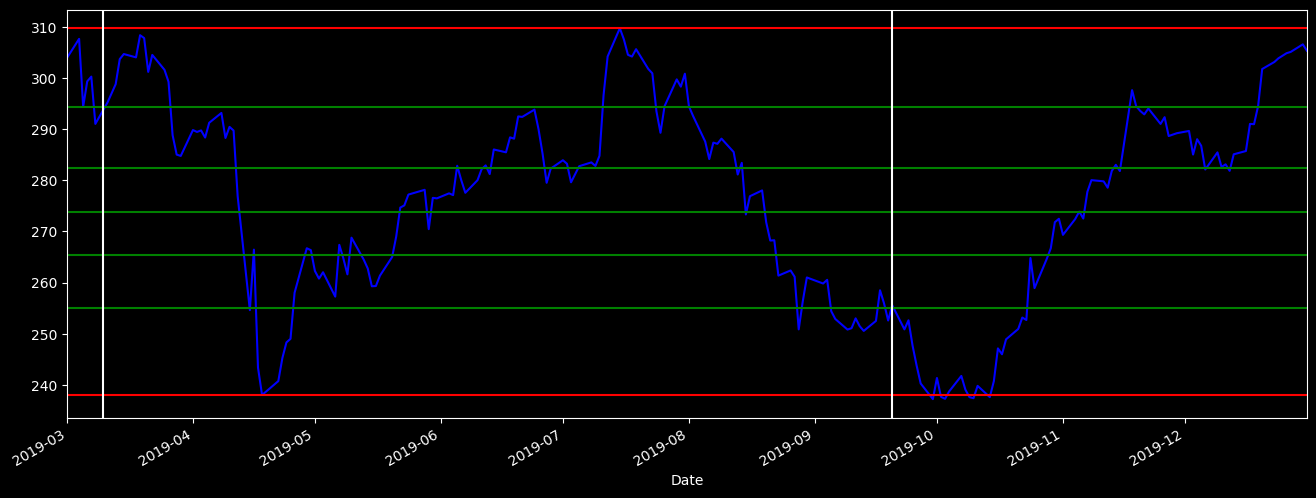

In [116]:

#for stock_name in stock_tags:
#    get_graph(stock_name, '2019-3-1','2019-12-31','2019-3-10','2019-9-20')


#NOTE: This graph doesnt show retracement, trend, or rolling mean

get_graph('ANTM', '2019-3-1','2019-12-31','2019-3-10','2019-9-20')

ANTM
Starting: 303.8699951171875
  Ending: 305.29998779296875
Days: 305


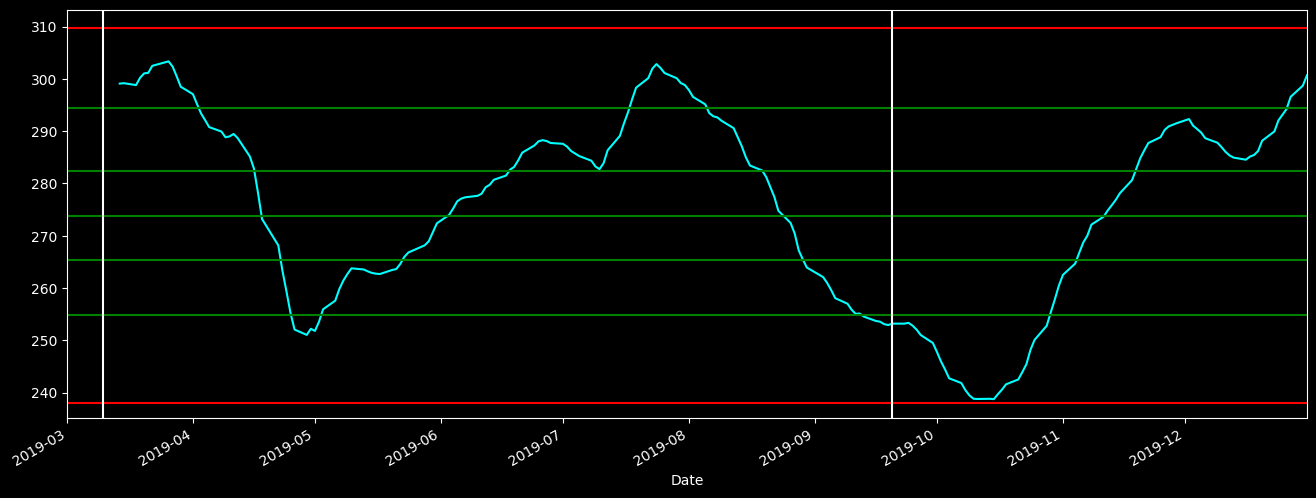

In [120]:
#NOTE: This graph doesnt show retracement, trend, or exact stock values
get_graph('ANTM', '2019-3-1','2019-12-31','2019-3-10','2019-9-20')

ANTM
Starting: 303.8699951171875
  Ending: 305.29998779296875
Days: 305


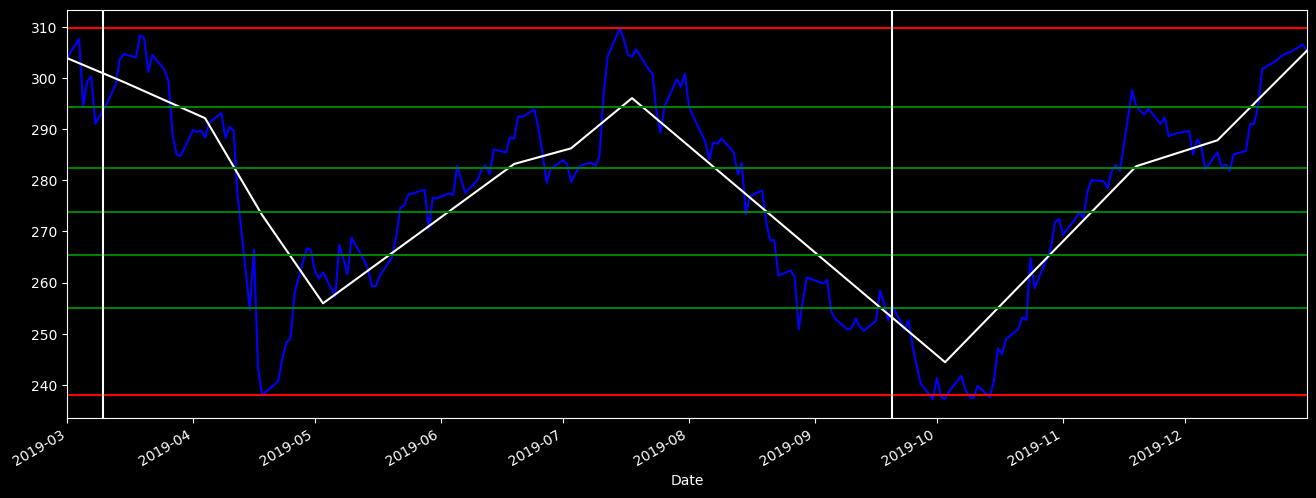

In [124]:
#NOTE: This graph doesnt show retracement or rolling mean

get_graph('ANTM', '2019-3-1','2019-12-31','2019-3-10','2019-9-20')

ANTM
Starting: 303.8699951171875
  Ending: 305.29998779296875
Days: 305


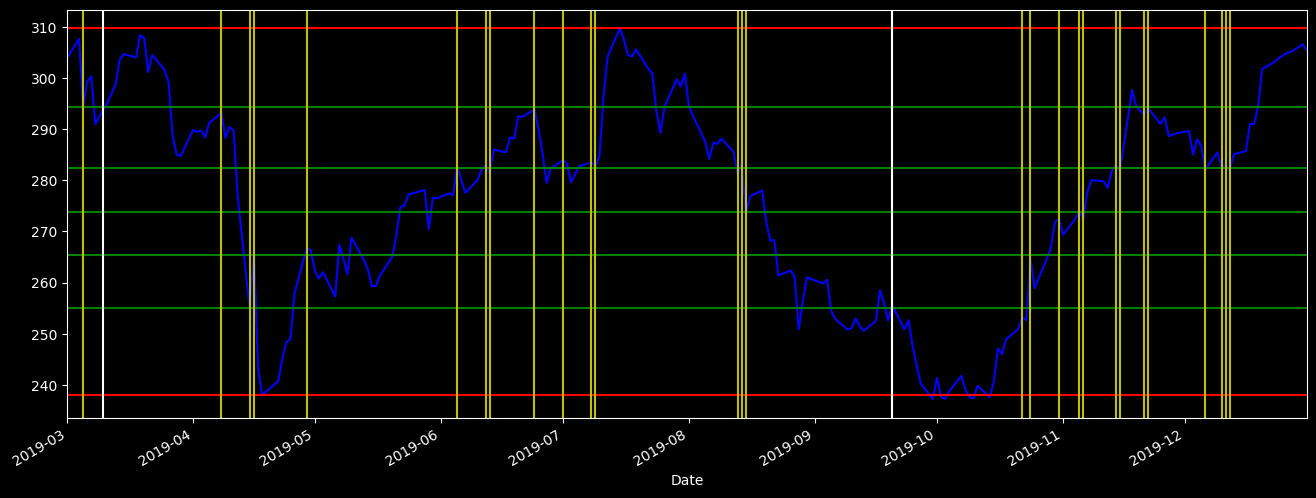

In [127]:
#NOTE: This graph doesnt show trend lines or rolling mean

get_graph('ANTM', '2019-3-1','2019-12-31','2019-3-10','2019-9-20')

ANTM
Starting: 303.8699951171875
  Ending: 305.29998779296875
Days: 305


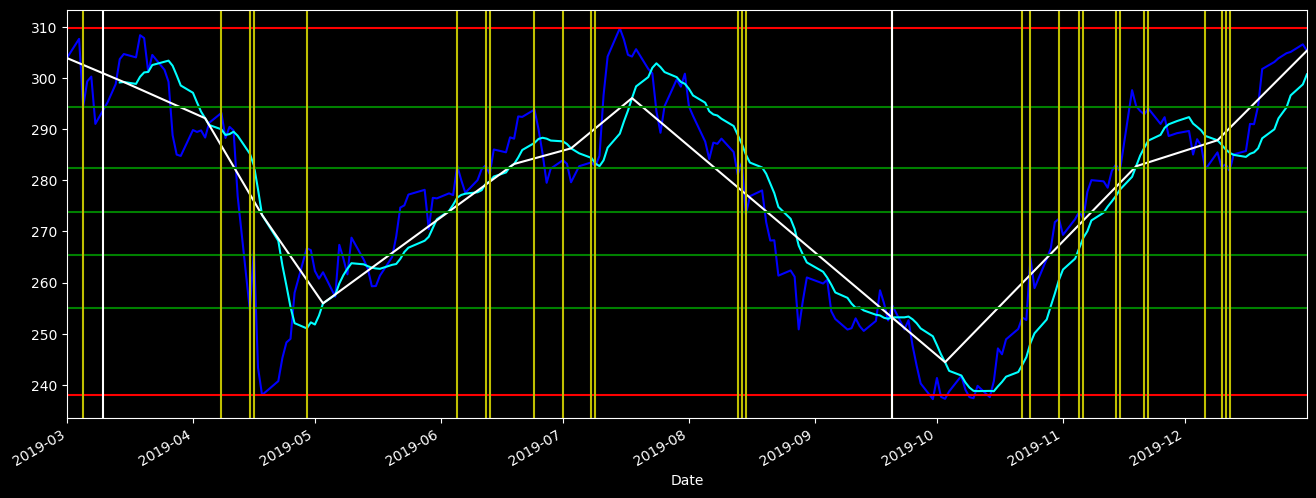

In [129]:
#NOTE: This graph shows all info

get_graph('ANTM', '2019-3-1','2019-12-31','2019-3-10','2019-9-20')